Question 9 -

Write a program to read the data from the following link, perform data analysis and answer the following
questions

Note -

1. Write code comments wherever required for code understanding

Link - https://data.wa.gov/api/views/f6w7-q2d2/rows.csv?accessType=DOWNLOAD

Insights to be drawn -
● Get all the cars and their types that do not qualify for clean alternative fuel vehicle
● Get all TESLA cars with the model year, and model type made in Kirkland.
● Get all the cars that have an electric range of more than 100, and were made after
2015
● Draw plots to show the distribution between city and electric vehicle type

In [15]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the data from the provided CSV link
url = "https://data.wa.gov/api/views/f6w7-q2d2/rows.csv?accessType=DOWNLOAD"
df = pd.read_csv(url)

# Get all the cars and their types that do not qualify for clean alternative fuel vehicle
not_qualify_cars = df[df['Clean Alternative Fuel Vehicle (CAFV) Eligibility'] == 'Not eligible due to low battery range'][['Make', 'Model']]
print("Cars that do not qualify for clean alternative fuel vehicle:")
print(not_qualify_cars)

# Get all TESLA cars with the model year, and model type made in Bothell City
tesla_cars_bothell = df[(df['Make'] == 'TESLA') & (df['City'] == 'Kirkland')][['Model Year', 'Model']]
print("\nTESLA cars made in Bothell City:")
print(tesla_cars_bothell)

# Get all the cars that have an electric range of more than 100, and were made after 2015
electric_cars_range_100 = df[(df['Electric Range'] > 100) & (df['Model Year'] > 2015)][['Make', 'Model']]
print("\nCars with electric range > 100 and made after 2015:")
print(electric_cars_range_100)



Cars that do not qualify for clean alternative fuel vehicle:
          Make        Model
6         FORD       FUSION
7         AUDI         Q5 E
8         FORD        C-MAX
14        FORD        C-MAX
15         KIA         NIRO
...        ...          ...
130377     BMW         530E
130385    AUDI           A3
130390    JEEP     WRANGLER
130407  TOYOTA  PRIUS PRIME
130437     BMW         530E

[16446 rows x 2 columns]

TESLA cars made in Bothell City:
        Model Year    Model
134           2020  MODEL 3
141           2023  MODEL 3
147           2022  MODEL Y
226           2019  MODEL 3
231           2018  MODEL 3
...            ...      ...
130117        2020  MODEL 3
130192        2023  MODEL Y
130299        2023  MODEL Y
130312        2017  MODEL S
130346        2019  MODEL 3

[2351 rows x 2 columns]

Cars with electric range > 100 and made after 2015:
          Make    Model
0        TESLA  MODEL X
2        TESLA  MODEL 3
4        TESLA  MODEL S
12       TESLA  MODEL 3
13       

<Figure size 1200x600 with 0 Axes>

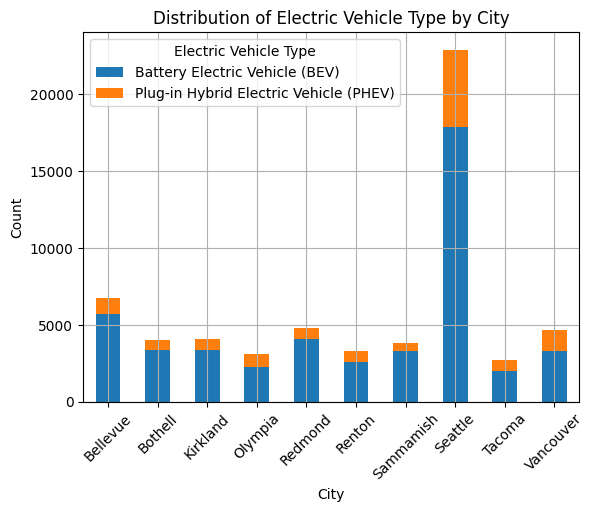

In [14]:
# Draw plots to show the distribution between city and electric vehicle type
plt.figure(figsize=(12, 6))
top_10_cities = df['City'].value_counts().head(10).index
df = df[df['City'].isin(top_10_cities)]
df.groupby(['City', 'Electric Vehicle Type']).size().unstack().plot(kind='bar', stacked=True)
plt.xlabel('City')
plt.ylabel('Count')
plt.title('Distribution of Electric Vehicle Type by City')
plt.legend(title='Electric Vehicle Type')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

In [2]:
df.head()

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
0,5YJXCAE26J,Yakima,Yakima,WA,98908.0,2018,TESLA,MODEL X,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,238,0,14.0,141151601,POINT (-120.56916 46.58514),PACIFICORP,5.307700e+10
1,JHMZC5F37M,Kitsap,Poulsbo,WA,98370.0,2021,HONDA,CLARITY,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,47,0,23.0,171566447,POINT (-122.64681 47.73689),PUGET SOUND ENERGY INC,5.303509e+10
2,5YJ3E1EB0K,King,Seattle,WA,98199.0,2019,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,220,0,36.0,9426525,POINT (-122.40092 47.65908),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303301e+10
3,1N4AZ0CP5D,King,Seattle,WA,98119.0,2013,NISSAN,LEAF,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,75,0,36.0,211807760,POINT (-122.3684 47.64586),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303301e+10
4,5YJSA1E21H,Thurston,Lacey,WA,98516.0,2017,TESLA,MODEL S,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,210,0,22.0,185810306,POINT (-122.75379 47.06316),PUGET SOUND ENERGY INC,5.306701e+10


In [3]:
df['Clean Alternative Fuel Vehicle (CAFV) Eligibility'].unique()

array(['Clean Alternative Fuel Vehicle Eligible',
       'Not eligible due to low battery range',
       'Eligibility unknown as battery range has not been researched'],
      dtype=object)

In [11]:
df['City'].value_counts()

Seattle        22894
Bellevue        6748
Redmond         4820
Vancouver       4652
Kirkland        4071
               ...  
Asheboro           1
Germantown         1
Saint Jacob        1
Watertown          1
Aurora             1
Name: City, Length: 656, dtype: int64

In [4]:
df.columns

Index(['VIN (1-10)', 'County', 'City', 'State', 'Postal Code', 'Model Year',
       'Make', 'Model', 'Electric Vehicle Type',
       'Clean Alternative Fuel Vehicle (CAFV) Eligibility', 'Electric Range',
       'Base MSRP', 'Legislative District', 'DOL Vehicle ID',
       'Vehicle Location', 'Electric Utility', '2020 Census Tract'],
      dtype='object')